In [13]:
using Plots
using Plots.PlotMeasures
using JLD2
using StatsBase
using StatsPlots
using PrettyTables

# Inspect ECG200 Benchmarking Results

Run 1:
- chi_max: [15, 40]
- sweeps fixed to 5
- d: [2, 6]
- eta: [0.001, 10]
- n = 30 models
- Particle Swarm Optimisation

In [3]:
f = jldopen("ECG200Bench_eta001:10_d2:6_chi15:40.jld2", "r");
per_fold_accs_r1 = read(f, "per_fold_accs");
per_fold_best_model_r1 = read(f, "per_fold_best_model");

In [22]:
mean_acc_r1 = mean(per_fold_accs_r1);
# println("Mean Acc: $mean_acc_r1")
median_acc_r1 = median(per_fold_accs_r1);
# println("Median Acc: $median_acc_r1")
range_acc_r1 = maximum(per_fold_accs_r1) - minimum(per_fold_accs_r1)
# println("Range Acc: $range_acc_r1")
std_acc_r1 = std(per_fold_accs_r1)
# println("Std Acc: $std_acc_r1")
standard_err_acc_r1 = std_acc_r1 / sqrt(length(per_fold_accs_r1));
# println("Standard Error Acc: $standard_err_acc_r1")
data = [mean_acc_r1, median_acc_r1, std_acc_r1, standard_err_acc_r1, range_acc_r1]'
header = ["Mean", "Median", "Std", "SE", "Range"]
pretty_table(data, header=header)

┌──────────┬────────┬───────────┬────────────┬───────┐
│     Mean │ Median │       Std │         SE │ Range │
├──────────┼────────┼───────────┼────────────┼───────┤
│ 0.889333 │   0.89 │ 0.0302784 │ 0.00552805 │  0.12 │
└──────────┴────────┴───────────┴────────────┴───────┘


Inspect the distribution of optimal parameters

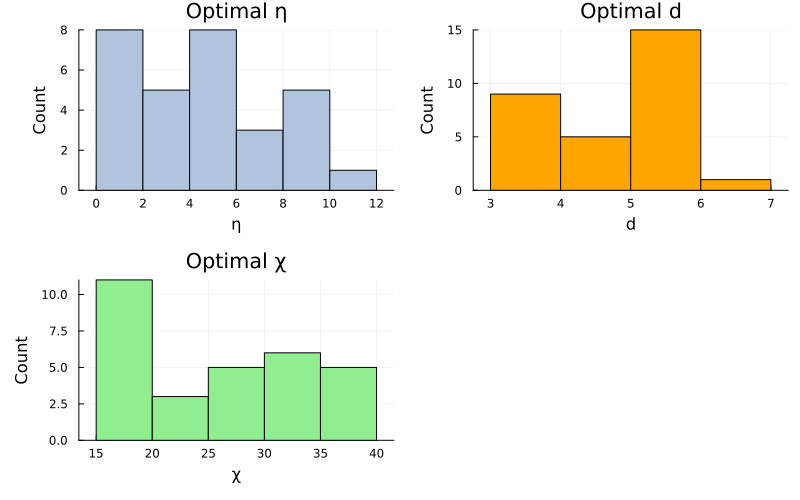

In [63]:
all_etas_r1 = [per_fold_best_model_r1[i]["eta"] for i in 1:length(per_fold_best_model_r1)]
all_ds_r1 = [per_fold_best_model_r1[i]["d"] for i in 1:length(per_fold_best_model_r1)]
all_chis_r1 = [per_fold_best_model_r1[i]["chi_max"] for i in 1:length(per_fold_best_model_r1)];
p1 = histogram(all_etas_r1, label="", xlabel="η", ylabel="Count", title="Optimal η", c=:lightsteelblue, bins=5)
p2 = histogram(all_ds_r1, label="", xlabel="d", ylabel="Count", title="Optimal d", c=:orange, bins=5)
p3 = histogram(all_chis_r1, label="", xlabel="χ", ylabel="Count", title = "Optimal χ", c=:lightgreen, bins=5)
plot(p1, p2, p3, size=(800, 500), left_margin=5mm, bottom_margin=5mm)

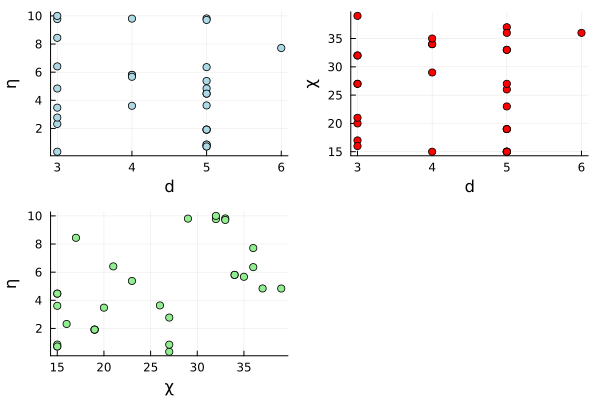

In [8]:
p1 = scatter(all_ds_r1, all_etas_r1, label="", xlabel="d", ylabel="η", color=:lightblue)
p2 = scatter(all_ds_r1, all_chis_r1, label="", xlabel="d", ylabel="χ", color=:red)
p3 = scatter(all_chis_r1, all_etas_r1, label="", xlabel="χ", ylabel="η", color=:lightgreen)
plot(p1, p2, p3)

Load in HC2 results

In [20]:
hc2 = [0.86, 0.87, 0.87, 0.94, 0.91, 0.91, 0.9 , 0.93, 0.91, 0.88, 0.9 ,
    0.89, 0.91, 0.87, 0.93, 0.95, 0.89, 0.96, 0.88, 0.89, 0.87, 0.87,
    0.88, 0.87, 0.9 , 0.86, 0.85, 0.9 , 0.93, 0.91]
hc2_mean = mean(hc2)
hc2_median = median(hc2)
hc2_range = maximum(hc2) - minimum(hc2)
hc2_std = std(hc2)
hc2_standard_error = hc2_std / sqrt(length(hc2));
data = [hc2_mean, hc2_median, hc2_std, hc2_standard_error, hc2_range]'
header = ["Mean", "Median", "Std", "SE", "Range"]
pretty_table(data, header=header)

┌──────────┬────────┬───────────┬────────────┬───────┐
│     Mean │ Median │       Std │         SE │ Range │
├──────────┼────────┼───────────┼────────────┼───────┤
│ 0.896333 │  0.895 │ 0.0282212 │ 0.00515246 │  0.11 │
└──────────┴────────┴───────────┴────────────┴───────┘


Load in InceptionTime results

In [28]:
icpt = [0.91, 0.91, 0.92, 0.9 , 0.91, 0.92, 0.91, 0.92, 0.93, 0.91, 0.87,
    0.87, 0.85, 0.89, 0.92, 0.9 , 0.83, 0.88, 0.92, 0.89, 0.88, 0.87,
    0.89, 0.92, 0.89, 0.9 , 0.85, 0.92, 0.88, 0.94]
icpt_mean = mean(icpt)
icpt_median = median(icpt)
icpt_range = maximum(icpt) - minimum(icpt)
icpt_std = std(icpt)
icpt_standard_error = icpt_std / sqrt(length(icpt));
data = [icpt_mean, icpt_median, icpt_std, icpt_standard_error, icpt_range]'
header = ["Mean", "Median", "Std", "SE", "Range"]
pretty_table(data, header=header)

┌──────────┬────────┬───────────┬────────────┬───────┐
│     Mean │ Median │       Std │         SE │ Range │
├──────────┼────────┼───────────┼────────────┼───────┤
│ 0.896667 │    0.9 │ 0.0260415 │ 0.00475451 │  0.11 │
└──────────┴────────┴───────────┴────────────┴───────┘


Load 1NN-DTW results

In [30]:
dtw = [0.77, 0.79, 0.79, 0.77, 0.81, 0.84, 0.75, 0.85, 0.77, 0.84, 0.8 ,
    0.7 , 0.84, 0.77, 0.8 , 0.8 , 0.84, 0.78, 0.79, 0.75, 0.81, 0.76,
    0.75, 0.8 , 0.82, 0.8 , 0.78, 0.8 , 0.78, 0.83]
dtw_mean = mean(dtw)
dtw_median = median(dtw)
dtw_range = maximum(dtw) - minimum(dtw)
dtw_std = std(dtw)
dtw_standard_error = dtw_std / sqrt(length(dtw))
data = [dtw_mean, dtw_median, dtw_std, dtw_standard_error, dtw_range]'
header = ["Mean", "Median", "Std", "SE", "Range"]
pretty_table(data, header=header)

┌──────────┬────────┬───────────┬────────────┬───────┐
│     Mean │ Median │       Std │         SE │ Range │
├──────────┼────────┼───────────┼────────────┼───────┤
│ 0.792667 │  0.795 │ 0.0337264 │ 0.00615757 │  0.15 │
└──────────┴────────┴───────────┴────────────┴───────┘


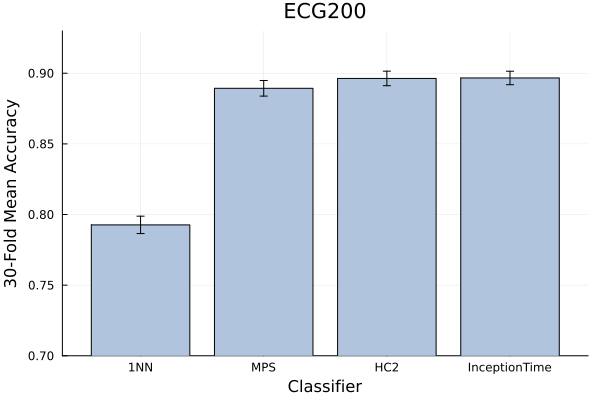

In [41]:
xs = ["1NN", "MPS", "InceptionTime", "HC2"]
ys = [dtw_mean, mean_acc_r1, icpt_mean, hc2_mean]
ses = [dtw_standard_error, standard_err_acc_r1, icpt_standard_error, hc2_standard_error]
order = sortperm(ys)
xs = xs[order]
ys = ys[order]
ses = ses[order]

p = bar(xs, ys, title="ECG200", c=:lightsteelblue, legend=:none, ylim=(0.7, 0.93), xlabel="Classifier",
    ylabel="30-Fold Mean Accuracy", yerr=ses)
#savefig("ECG200BarPlot.svg")